In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from graphviz import Source
from sklearn import tree
from IPython.display import SVG


### 01. Dados

In [2]:
microdados_ = pd.read_pickle('microdados_.pkl')
microdados_.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,renda_percapita,classe_renda_percapita,icp_comp_01,icp_comp_02_parcial,icp_comp_02,icp_comp_03_parcial,icp_comp_03,icp,regiao,id
0,210057280536,2022,20 anos,Feminino,Solteiro(a),Preta,Brasileiro(a),Já concluí o Ensino Médio,2020,Não Respondeu,...,303.0,3,1,3.5,1,9,4,6,Sem informação,Sem informação
1,210055724397,2022,21 anos,Masculino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2020,Não Respondeu,...,0.0,1,1,4.5,3,2,1,5,Sem informação,9.0
2,210055778089,2022,21 anos,Feminino,Solteiro(a),Preta,Brasileiro(a),Já concluí o Ensino Médio,Não informado,Não Respondeu,...,121.2,1,1,4.5,3,8,3,7,Sem informação,6.0
3,210055461467,2022,19 anos,Feminino,Solteiro(a),Parda,Brasileiro(a),Já concluí o Ensino Médio,2021,Não Respondeu,...,303.0,3,1,3.0,1,8,3,5,Sem informação,7.0
4,210054972570,2022,17 anos,Feminino,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Privada,...,151.5,2,1,3.5,1,8,3,5,Sem informação,Sem informação


In [3]:
microdados_.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [4]:
preditores = ['regiao', 'TP_FAIXA_ETARIA', 'TP_COR_RACA', 'TP_SEXO', 'icp_comp_01', 'icp_comp_02', 'icp_comp_03', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_ENSINO']


In [5]:
df_modelo = microdados_[preditores+['nota_media_geral']].dropna(axis=0, how='any')
df_modelo = df_modelo[df_modelo['nota_media_geral'] > 0]

In [6]:
df_modelo.head()

,regiao,TP_FAIXA_ETARIA,TP_COR_RACA,TP_SEXO,icp_comp_01,icp_comp_02,icp_comp_03,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_ENSINO,nota_media_geral
20,Nordeste,20 anos,Parda,Feminino,1,1,2,Estadual,Urbana,Em atividade,Ensino Regular,471.94
35,Sudeste,18 anos,Branca,Feminino,2,4,3,Privada,Urbana,Em atividade,Ensino Regular,793.54
37,Centro-Oeste,17 anos,Parda,Masculino,2,5,2,Estadual,Urbana,Em atividade,Ensino Regular,579.24
39,Norte,18 anos,Parda,Feminino,1,1,3,Estadual,Urbana,Em atividade,Educação Especial - Modalidade Substitutiva,469.96
44,Sudeste,18 anos,Branca,Masculino,2,2,3,Estadual,Urbana,Em atividade,Ensino Regular,489.66


In [7]:
len(df_modelo)

718751

##### Ajustando variáveis de faixa etária, tipo de dependência administrativa, funcionamento, raça e região

In [8]:
def faixa_etaria(faixa):
    if faixa in ['Menor de 17 anos', '17 anos', '18 anos', '19 anos']:
        y = 1
    elif faixa in ['20 anos', '21 anos', '22 anos', '23 anos', '24 anos', '25 anos']:
        y = 2
    else:
        y = 3
    return y
    
df_modelo['TP_FAIXA_ETARIA'] = df_modelo['TP_FAIXA_ETARIA'].map(faixa_etaria)

def tda(x):
    if x in ['Municipal', 'Estadual']:
        y = 1
    elif x=='Federal':
        y = 2
    else:
        y = 3
    return y

df_modelo['TP_DEPENDENCIA_ADM_ESC'] = df_modelo['TP_DEPENDENCIA_ADM_ESC'].map(tda)

def funcionamento(x):
    if x=='Em atividade':
        y = 1
    else:
        y = 0 
    return y

df_modelo['TP_SIT_FUNC_ESC'] = df_modelo['TP_SIT_FUNC_ESC'].map(funcionamento)

def raca(x):
    if x in ['Preta', 'Indígena']:
        y = 1
    elif x in ['Parda', 'Não declarado']:
        y = 2
    else:
        y = 3
    return y

df_modelo['TP_COR_RACA'] = df_modelo['TP_COR_RACA'].map(raca)

def regiao(x):
    if x in ['Norte', 'Nordeste']:
        y = 1
    else:
        y = 0
    return y

df_modelo['regiao'] = df_modelo['regiao'].map(regiao)

##### Transformando variáveis categóricas (One hot encding)

In [9]:
# One-Hot Encoding
categoricas = ['TP_SEXO', 'TP_LOCALIZACAO_ESC', 'TP_ENSINO']
df_modelo = pd.get_dummies(data = df_modelo, prefix = 'OHE', prefix_sep='_',
               columns = categoricas,
               drop_first =False,
              dtype='int8')

In [10]:
df_modelo.head()

,regiao,TP_FAIXA_ETARIA,TP_COR_RACA,icp_comp_01,icp_comp_02,icp_comp_03,TP_DEPENDENCIA_ADM_ESC,TP_SIT_FUNC_ESC,nota_media_geral,OHE_Feminino,OHE_Masculino,OHE_Rural,OHE_Urbana,OHE_Educação Especial - Modalidade Substitutiva,OHE_Ensino Regular
20,1,2,2,1,1,2,1,1,471.94,1,0,0,1,0,1
35,0,1,3,2,4,3,3,1,793.54,1,0,0,1,0,1
37,0,1,2,2,5,2,1,1,579.24,0,1,0,1,0,1
39,1,1,2,1,1,3,1,1,469.96,1,0,0,1,1,0
44,0,1,3,2,2,3,1,1,489.66,0,1,0,1,0,1


### 02. Modelo

In [20]:
X = df_modelo.drop('nota_media_geral', axis=1)
y = df_modelo['nota_media_geral']

In [21]:
# Dividindo a base em treino e teste
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=54)

In [44]:
# Grid para seleção de hiperparâmetros

dtr=DecisionTreeRegressor()

params = {'model__max_depth' : [2,3],
        'model__criterion' : ['squared_error', 'friedman_mse'],
        'model__random_state' : [54]}

pipe = Pipeline([('model', dtr)])


grid = GridSearchCV(pipe,params,cv=5)

grid.fit(X_train,y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', DecisionTreeRegressor())]),
             param_grid={'model__criterion': ['squared_error', 'friedman_mse'],
                         'model__max_depth': [2, 3],
                         'model__random_state': [54]})

In [45]:
grid.best_params_


{'model__criterion': 'squared_error',
 'model__max_depth': 3,
 'model__random_state': 54}

In [46]:
best = grid.best_estimator_
best.fit(X_train,y_train)


Pipeline(steps=[('model', DecisionTreeRegressor(max_depth=3, random_state=54))])

In [47]:
y_pred=best.predict(X_test)


In [48]:
print(mean_absolute_error(y_test,y_pred), mean_absolute_percentage_error(y_test,y_pred))


68.94656842071387 0.1631367287847213


In [49]:
df_comparacao = pd.DataFrame({'real': y_test, 'previsto': y_pred}).sort_values('real').reset_index(drop=True)
x = []
y0 = []
y1 = []
base = 0
count = 1

for i in range(len(df_comparacao)):
    if i%1437==0:
        x.append(count)
        y0.append(df_comparacao.iloc[base:i][:]['real'].mean())
        y1.append(df_comparacao.iloc[base:i][:]['previsto'].mean())
        count+=1
        base=i                

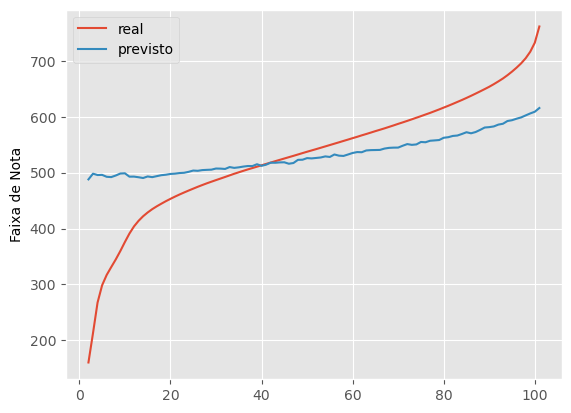

In [61]:
plt.plot(x, y0, label = "real") 
plt.plot(x, y1, label = "previsto") 
plt.legend()
plt.ylabel('Faixa de Nota')
#plt.ylim((300,700))
plt.show()

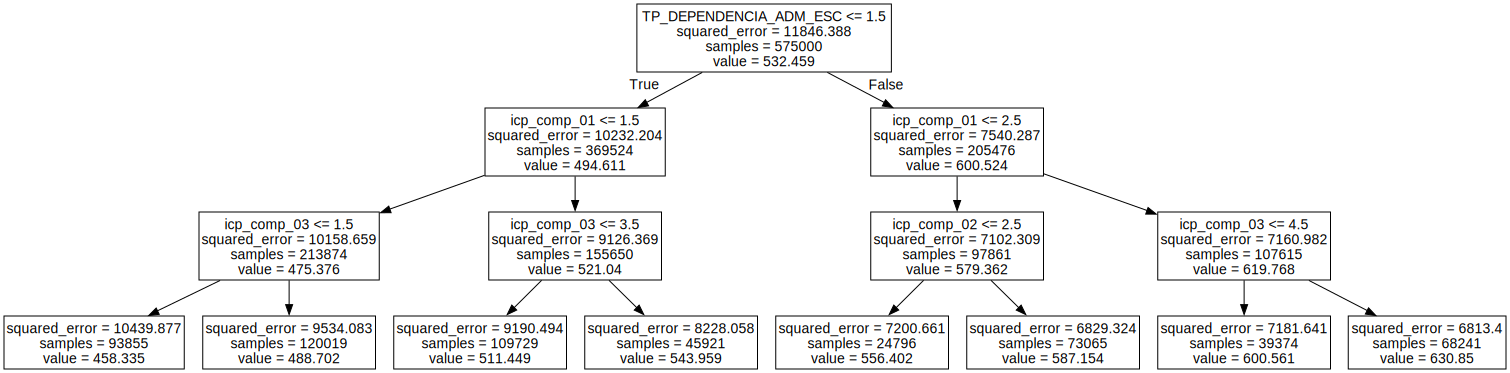

In [51]:
# plot tree
final=DecisionTreeRegressor(max_depth=3, random_state=54, criterion='squared_error')
final.fit(X_train,y_train)
graph = Source( tree.export_graphviz(final, out_file=None, feature_names=X.columns))
graph

In [52]:
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'